In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

sns.set()
import matplotlib.pyplot as plt

# sharper plots
%config InlineBackend.figure_format = 'retina'

$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$

# Homework 1
## Homework guideline
- The deadline is Sep 15th 10:30am. Submission after the deadline will not be graded.

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.


- Colab is preferred. However, if you use Anaconda, please download the data file locally and save it to the same folder as this homework file.

**Collaboration:** List the names of all people you
collaborated with and for which question(s). This is important!

# Q1: Predicting heart diseases (40pt)
**Goal:** Predict presence or absence of cardiovascular disease (CVD) using the patient examination results.

**Data description**

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


In [ ]:
!wget https://raw.githubusercontent.com/yexf308/PracticalML/main/data/mlbootcamp5_train.csv?raw=true -O mlbootcamp5_train.csv


--2023-05-18 19:56:28--  https://raw.githubusercontent.com/yexf308/PracticalML/main/data/mlbootcamp5_train.csv?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941524 (2.8M) [text/plain]
Saving to: ‘mlbootcamp5_train.csv’

mlbootcamp5_train.c 100%[===================>]   2.80M  --.-KB/s    in 0.02s   

2023-05-18 19:56:29 (182 MB/s) - ‘mlbootcamp5_train.csv’ saved [2941524/2941524]



In [ ]:
df = pd.read_csv('mlbootcamp5_train.csv',index_col="id", sep=";")

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0




---


## Q1.1: Transform the features (3pt)
It is important to preprocessing your data.

- create "age in years" dividing age by 365.25 and taking floor ($\lfloor{x}\rfloor$ is the largest integer that is less than or equal to $x$)
- create 3 binary features based on `cholesterol`.
- create 3 binary features based on `gluc`.
<br> Binary features equal to 1, 2 or 3. This method is called dummy-encoding or One Hot Encoding (OHE). It is more convenient to use `pandas.get_dummies`. There is no need to use the original features `cholesterol` and `gluc` after encoding.

In [ ]:
# Q1.1



---


## Q1.2: Create Validation set (2pt)
Split data into train and holdout parts in the proportion of 70/30 using `sklearn.model_selection.train_test_split` with `random_state=17`.

In [ ]:
# Q1.2



---


## Q1.3: First Try: Decision Tree (10pt)
- Train a decision tree on the dataset `(X_train, y_train)` with **max depth equal to 3** and `random_state=17`.

- Plot this tree with `sklearn.tree.export_graphviz` and Graphviz.  

- Which 3 features are used to make predictions in the created decision tree?

In [ ]:
# Q1.3



---


## Q1.4: Second Try: Cross-Validation (10pt)
- Set up the depth of the tree using cross-validation on the dataset `(X_train, y_train)` in order to increase quality of the model. Use `GridSearchCV` with 5 folds. Fix `random_state=17` and change  `max_depth` from 2 to 10.

- Draw the plot to show how mean accuracy is changing in regards to `max_depth` value on cross-validation.

- Print the best value of `max_depth` where the mean value of cross-validation quality metric reaches maximum. Also compute accuracy on holdout data. This can be done with the trained instance of the class `GridSearchCV`.

- Сalculate the effect of `GridSearchCV`: check out the expression (acc2 - acc1) / acc1 * 100%, where acc1 and acc2 are accuracies on holdout data before and after tuning max_depth with GridSearchCV respectively.

In [ ]:
# Q1.4

## Q1.5: Final Try: Feature Engineering (15pt)
From the SCORE table to estimate ten-year risk of fatal cardiovascular disease in Europe. The source paper is [here](https://academic.oup.com/eurheartj/article/24/11/987/427645).

Create a sub dataframe with the following features:
-  ``smoke`` feature.

- Build the ``cholesterol``  and ``gender`` features. Transform the ``cholesterol`` to 3 binary features according to it's 3 unique values ( ``cholesterol``=1,  ``cholesterol``=2 and  ``cholesterol``=3). Transform the ``gender`` from 1 and 2 into 0 and 1. It is better to rename it to ``male`` (0 – woman, 1 – man). In general, this is typically done with ``sklearn.preprocessing.LabelEncoder`` but here in case of only 2 unique values it's not necessary.

- **New feature**, Age in year: age $\in [40,50)$, age $\in [50,55)$, age $\in [55,60)$, age $\in [60,65) $ (4 features)
- **New feature**, systolic blood pressure: ap\_hi $\in [120,140)$, ap\_hi $\in [140,160)$, ap\_hi $\in [160,180),$ (3 features)


If the values of age or blood pressure don't fall into any of the intervals then all binary features will be equal to zero.

Finally, the decision tree is built using these 12 binary features (excluding all original features that we had before this feature engineering part).

- Create a decision tree with the limitation `max_depth=3` and train it on the whole train data. Use the `DecisionTreeClassifier` class with fixed `random_state=17`, but all other arguments (except for `max_depth` and `random_state`) should be left with their default values.

- Which binary feature is the most important for heart disease detection?

- After feature engineering, does accuracy on holdout data improve?




In [ ]:
# Q1.5



---



---


# Q2: Predicting credit repayment (60pt)
**Goal:**
Predict whether the customer will repay their credit within 90 days. This is a binary classification problem; we will assign customers into good or bad categories based on our prediction.

**Data description**

| Feature | Variable Type | Value Type | Description |
|:--------|:--------------|:-----------|:------------|
| age | Input Feature | integer | Customer age |
| DebtRatio | Input Feature | real | Total monthly loan payments (loan, alimony, etc.) / Total monthly income percentage |
| NumberOfTime30-59DaysPastDueNotWorse | Input Feature | integer | The number of cases when client has overdue 30-59 days (not worse) on other loans during the last 2 years |
| NumberOfTimes90DaysLate | Input Feature | integer | Number of cases when customer had 90+dpd overdue on other credits |
| NumberOfTime60-89DaysPastDueNotWorse | Input Feature | integer | Number of cased when customer has 60-89dpd (not worse) during the last 2 years |
| NumberOfDependents | Input Feature | integer | The number of customer dependents |
| SeriousDlqin2yrs | Target Variable | binary: <br>0 or 1 | Customer hasn't paid the loan debt within 90 days |


In [ ]:
!wget https://raw.githubusercontent.com/yexf308/PracticalML/main/data/credit_scoring_sample.csv?raw=true -O credit_scoring_sample.csv


--2023-05-19 14:05:35--  https://raw.githubusercontent.com/yexf308/PracticalML/main/data/credit_scoring_sample.csv?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1812928 (1.7M) [text/plain]
Saving to: ‘credit_scoring_sample.csv’

credit_scoring_samp 100%[===================>]   1.73M  --.-KB/s    in 0.06s   

2023-05-19 14:05:36 (29.3 MB/s) - ‘credit_scoring_sample.csv’ saved [1812928/1812928]



In [ ]:
data = pd.read_csv('credit_scoring_sample.csv',sep=";")
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      45063 non-null  int64  
 1   age                                   45063 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  45063 non-null  int64  
 3   DebtRatio                             45063 non-null  float64
 4   NumberOfTimes90DaysLate               45063 non-null  int64  
 5   NumberOfTime60-89DaysPastDueNotWorse  45063 non-null  int64  
 6   MonthlyIncome                         36420 non-null  float64
 7   NumberOfDependents                    43946 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


Look at the distribution of the target variable

Distribution of target:


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

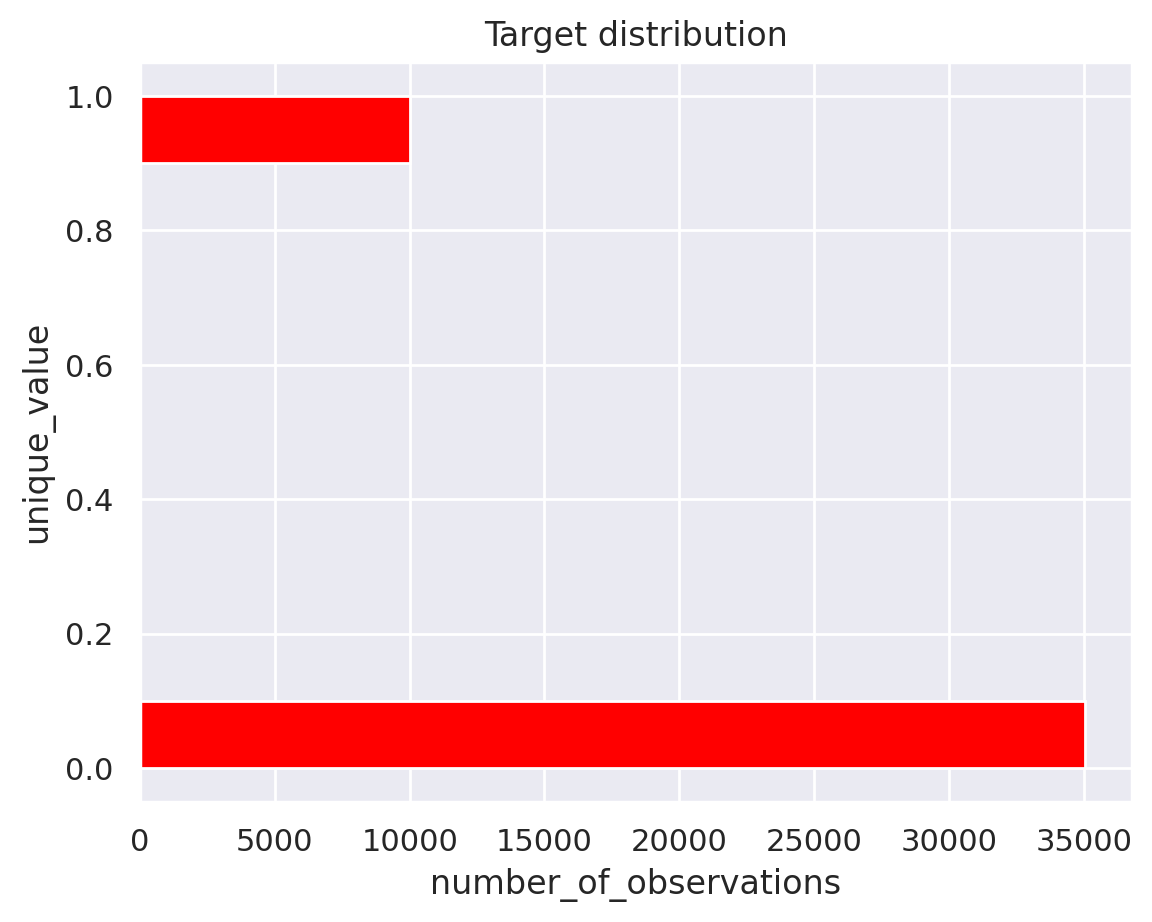

In [ ]:
ax = data["SeriousDlqin2yrs"].hist(orientation="horizontal", color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of target:")
data["SeriousDlqin2yrs"].value_counts(normalize=True)

Select all the features and drop the target:

In [ ]:
independent_columns_names = data.columns.values
independent_columns_names = [x for x in data if x != "SeriousDlqin2yrs"]
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']



---


## Q2.1 Data Preprocessing (5pt)
- Write a function that replaces all NaN values with the median value of the corresponding feature. Apply this function to this dataset.

- Split the target and features to $X$ and $y$ - now we get a training set.


In [ ]:
# Q2.1




---


## Q2.2 Understand Dataset (10pt)
Make an interval estimate based on the bootstrap (2000 samples) of the average income (MonthlyIncome)  of customers who had overdue loan payments, and of those who paid in time, make 80% confidence interval. Use target value (SeriousDlqin2yrs) to split data. Find the difference between the lower limit of the derived interval for those who paid in time and the upper limit for those who are overdue.
So, you are asked to build 80% intervals for the income of "good" customers `[good_income_lower, good_income_upper]` and for "bad" – [`bad_income_lower`, `bad_income_upper`] and find the difference  `good_income_upper - bad_income_lower`. Set `np.random.seed(17)`.

In [ ]:
# Q2.2




---
One of the main performance metrics of a model is the area under the ROC curve. The ROC-AUC values lay between 0 and 1. The closer the value of ROC-AUC to 1, the better the classification is done.

We also use the parameter `random_state = 17` for the reproducibility of the results.


## Q2.3: First Try: Decision Tree (10pt)


Find the values of `DecisionTreeClassifier` hyperparameters using the `GridSearchCV`, which maximize the area under the ROC curve.

Use the `DecisionTreeClassifier` class to create a decision tree. Due to the imbalance of the classes in the target, we add the balancing parameter.
We will look through such values of hyperparameters:
```
max_depth_values = [5, 6, 7, 8, 9]
max_features_values = [4, 5, 6, 7]
```

Fix cross-validation parameters: stratified, 5 partitions with shuffle,
`random_state`. We will use this splitting throughout the notebook.

- What is the maximum ROC AUC value (round up to 2 decimals)?
- We call cross-validation **stable** if the standard deviation of the metric on the cross-validation is less than 0.01.
Was cross-validation stable under optimal combinations of hyperparameters (i.e., providing a maximum of the mean ROC AUC value for cross-validation)?

In [ ]:
# Q2.3

## Q2.4: Second Try: Random Forest (10pt)
we found the optimal hyperparameters for one tree. However it could be that these parameters are not optimal for Random Forest. Use `n_estimators=10` in the setting.
Now we extend the value of `max_depth` up to 15, because the trees need to be deeper in the forest (you should be aware of it from the [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-5-ensembles-of-algorithms-and-random-forest-8e05246cbba7)).
- What are the best values of hyperparameters now?
- What feature has the weakest impact in Random Forest model?

In [ ]:
# Q2.4

## Q2.5: Third Try: Logistic Regression (10pt)
Now let's compare our results with logistic regression (we indicate `class_weight = 'balanced'`, `solver='liblinear'` and `random_state=17`). Do a full search by the parameter `C` from a wide range of values `np.logspace (-8, 8, 17)`.
Now we will build a pipeline - first apply Standard scaling, then train the model.

- Learn about the pipelines and make cross-validation. What is the best average ROC AUC?

- Feature importance is defined by the absolute value of its corresponding coefficient. First, you need to normalize all of the feature values so that it will be valid to compare them. What is the most important feature for the best logistic regression model?


In [ ]:
# Q2.5

## Q2.6: Interpret the impact of Age (5pt)
Let’s see how we can interpret the impact of our features. For this, recalculate the logistic regression with absolute values, that is without scaling. Next, modify the customer’s age by adding 20 years, keeping the other features unchanged. How many times will the chance that the customer will not repay their debt increase? You can find an example of the theoretical calculation [here](https://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf).

In [ ]:
# Q2.6

## Q2.7: Final Try: Bagging (10pt)
Fit a bagging classifier with `random_state=42`. For the base classifiers, use 100 logistic regressors and use `RandomizedSearchCV` instead of `GridSearchCV`.
```
parameters = {
    "max_features": [2, 3, 4],
    "max_samples": [0.5, 0.7, 0.9],
    "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100],
}
```

It will take a lot of time to iterate over all 54 variants, so set the maximum number of iterations for `RandomizedSearchCV` to 20. Don’t forget to set the parameters cv. What is the best ROC AUC you achieve?

In [ ]:
# Q2.7